Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')
  REGION       SETTLEMENTDATE  TOTALDEMAND    RRP PERIODTYPE
0   NSW1  2018/01/01 00:30:00      6912.25  91.86      TRADE
1   NSW1  2018/01/01 01:00:00      6745.63  88.83      TRADE
2   NSW1  2018/01/01 01:30:00      6466.06  73.62      TRADE
3   NSW1  2018/01/01 02:00:00      6279.80  71.49      TRADE
4   NSW1  2018/01/01 02:30:00      6177.31  69.27      TRADE


<ipython-input-2-34624b1b460f>:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_numeric.resample('H').mean()


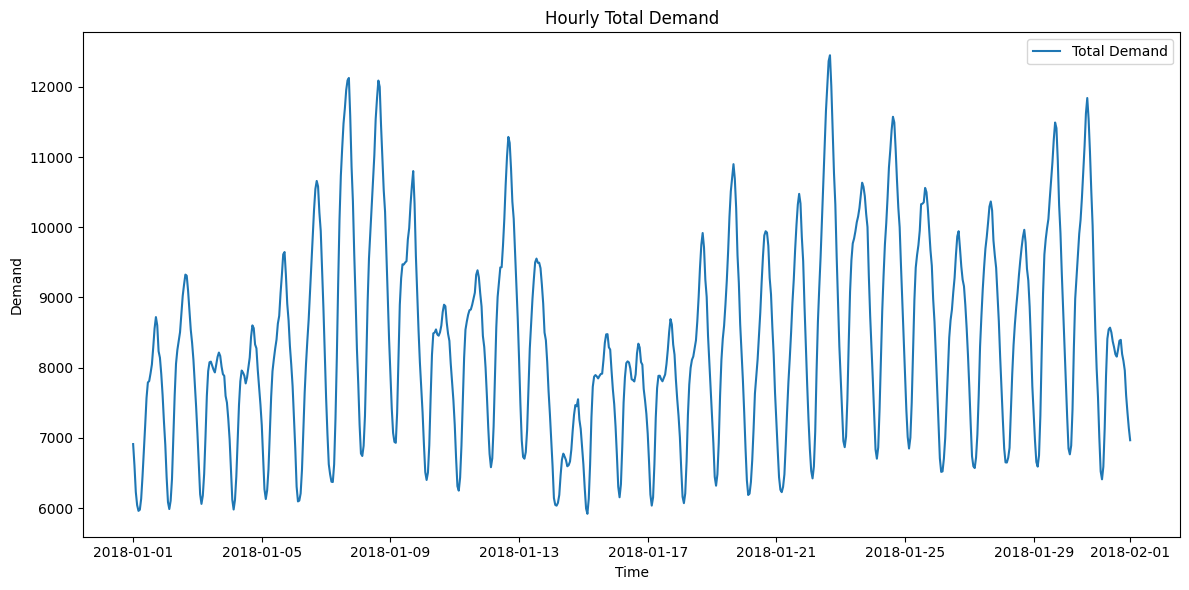

                               SARIMAX Results                                
Dep. Variable:            TOTALDEMAND   No. Observations:                  745
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4802.839
Date:                Thu, 17 Apr 2025   AIC                           9617.678
Time:                        08:13:54   BIC                           9645.350
Sample:                    01-01-2018   HQIC                          9628.344
                         - 02-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1654      0.037     31.116      0.000       1.092       1.239
ar.L2         -0.2043      0.057     -3.574      0.000      -0.316      -0.092
ar.L3         -0.1853      0.060     -3.109      0.0

<ipython-input-2-34624b1b460f>:51: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(df_hourly.index[-1], periods=25, freq='H')[1:], forecast, color='red', label='Forecast')


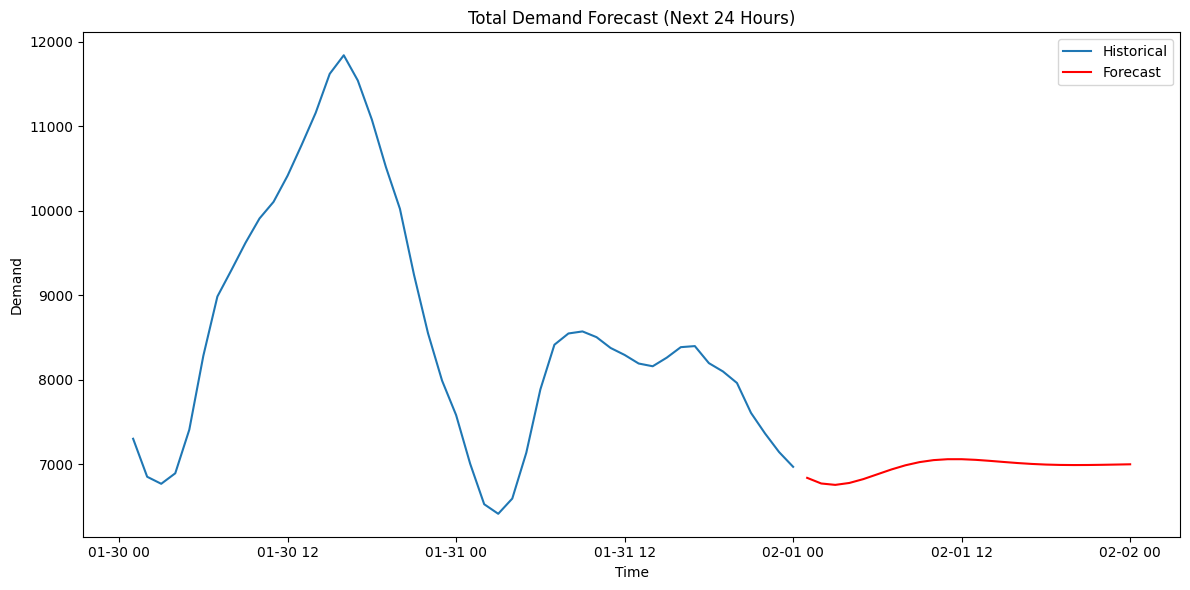

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = '/content/PRICE_AND_DEMAND_201801_NSW1.csv'
df = pd.read_csv(file_path)

# Check columns and first rows
print(df.columns)
print(df.head())

# Convert datetime column
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])

# Set datetime as index
df.set_index('SETTLEMENTDATE', inplace=True)

# Keep only numeric columns (especially 'TOTALDEMAND')
df_numeric = df[['TOTALDEMAND']].copy()

# Resample to hourly average (optional, depending on frequency of original data)
df_hourly = df_numeric.resample('H').mean()

# Drop NaNs if any after resampling
df_hourly.dropna(inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['TOTALDEMAND'], label='Total Demand')
plt.title('Hourly Total Demand')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.tight_layout()
plt.show()

# Fit ARIMA model (adjust order as needed)
model = ARIMA(df_hourly['TOTALDEMAND'], order=(5, 1, 0))
model_fit = model.fit()

# Summary
print(model_fit.summary())

# Forecast next 24 hours
forecast = model_fit.forecast(steps=24)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index[-48:], df_hourly['TOTALDEMAND'][-48:], label='Historical')
plt.plot(pd.date_range(df_hourly.index[-1], periods=25, freq='H')[1:], forecast, color='red', label='Forecast')
plt.title('Total Demand Forecast (Next 24 Hours)')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.tight_layout()
plt.show()
